## SHAP (SHapley Additive exPlanations) 原理及應用

**SHAP (SHapley Additive exPlanations)** 是一種強大的解釋方法，基於合作博弈論中的 Shapley 值，能幫助我們解釋機器學習模型對於單一預測的貢獻度。它的核心目標是透過計算不同特徵對預測結果的「貢獻值」，來揭示模型如何進行決策。

### 原理介紹

SHAP 方法的核心基礎來自於 Shapley 值理論，該理論來自博弈論中的合作賽局。Shapley 值用於分配收益，告訴我們在多個參與者共同完成一個任務後，應該如何公平分配每個參與者的貢獻。應用到機器學習中，這意味著我們可以為每個特徵分配一個「貢獻分數」，該分數反映了該特徵對模型預測結果的影響。

SHAP 值的計算過程通過對所有可能的特徵子集進行平均化貢獻來進行，這保證了結果的公平性。雖然這個過程在理論上非常完整，但實際上會比較耗費計算資源，因此有些近似算法被開發來加速 SHAP 值的計算。

### SHAP 的工作原理

1. **模型的輸出分解**：SHAP 值的目標是將模型的輸出分解成每個特徵的加權貢獻值，這些貢獻值的總和即為最終的預測值。
   
2. **Shapley 值的計算**：對於每個特徵，SHAP 值考慮的是當該特徵與其他特徵組合在一起時，它所帶來的平均增量貢獻。這涉及計算每個特徵在不同特徵子集中的「邊際貢獻」。
   
3. **模型無關性**：SHAP 是模型無關的，這意味著它可以解釋任何類型的模型（包括樹模型、線性模型和深度學習模型）。

### SHAP 的應用場景

1. **解釋單個預測**：SHAP 可以用來解釋單個預測結果，告訴我們每個特徵在這次預測中的具體影響。
   
2. **全局解釋模型**：通過對多個樣本的 SHAP 值進行聚合，SHAP 還可以用來提供模型的全局解釋，幫助我們理解整個數據集中各個特徵的重要性。

3. **模型的公平性分析**：SHAP 也可以用來進行公平性分析，幫助識別某些特徵（如性別或種族）是否對模型預測結果有過大的影響。

### 優點與限制

- **優點**：
   - 提供了對於複雜模型（如深度學習、隨機森林等）的解釋能力。
   - Shapley 值理論保證了解釋的公平性。
   - 可以用來分析單個樣本的解釋，也可以生成全局模型解釋。

- **限制**：
   - 計算 SHAP 值在高維度特徵空間時可能會非常耗時。
   - 對於某些特定模型，計算 SHAP 值的近似算法可能會有誤差。

---

要查第2筆或第15筆資料，只需要將 `shap.force_plot` 的索引修改成對應資料的索引即可。

- **第2筆資料**：
  將 `shap_values[0]` 修改為 `shap_values[1]`，因為索引從0開始。
  ```python
  shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data.feature_names)
  ```

- **第15筆資料**：
  修改為 `shap_values[14]` 來對應第15筆資料。
  ```python
  shap.force_plot(explainer.expected_value, shap_values[14], X_test[14], feature_names=data.feature_names)
  ```

只需將索引更改為你要查詢的資料位置即可。在這個例子中，資料索引從 `0` 開始，因此第2筆資料對應的是索引1，第15筆資料對應的是索引14。

---

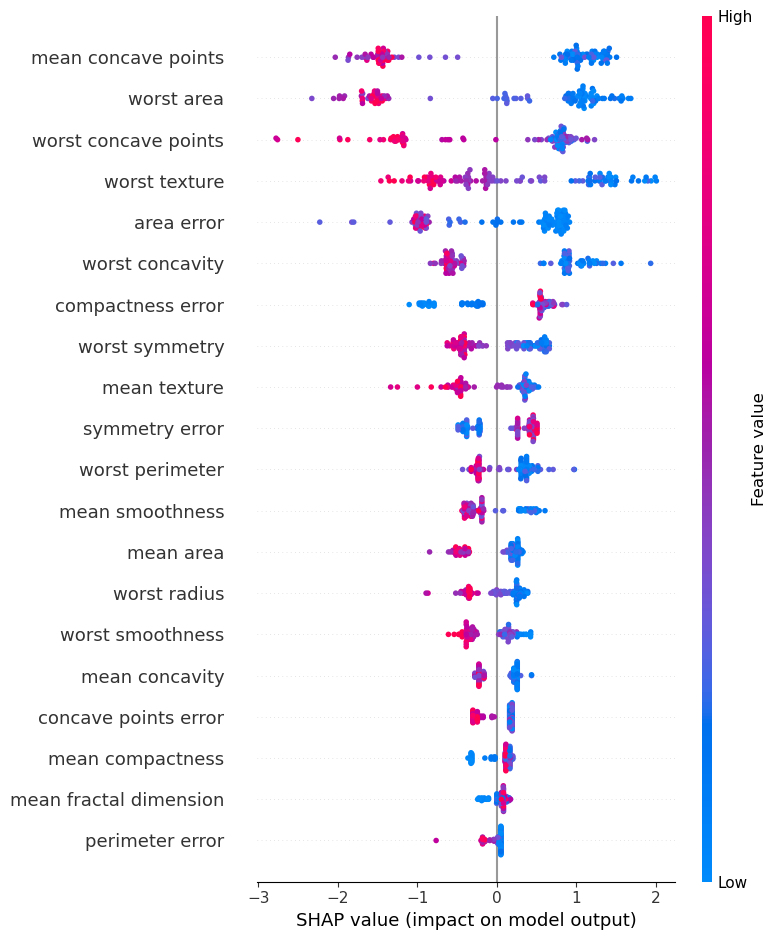

In [3]:
import shap
import xgboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 讀取資料集
data = load_breast_cancer() # 乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42) # 切分訓練集/測試集

# 訓練 XGBoost 分類模型
model = xgboost.XGBClassifier() # 創建 XGBoost 分類模型
model.fit(X_train, y_train) # 訓練模型

# 使用 SHAP 來解釋模型
explainer = shap.Explainer(model)   # 創建 SHAP 解釋器
shap_values = explainer(X_test)    # 解釋模型

# 畫出 SHAP 值的摘要圖
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)    # 繪製摘要圖

# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test[0], feature_names=data.feature_names)  # 解釋第一筆數據

In [5]:
# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[10].values, X_test[10], feature_names=data.feature_names)   # 解釋第十筆數據

In [6]:
# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[15].values, X_test[15], feature_names=data.feature_names)   # 解釋第十五筆數據 